In [ ]:
!pip install softposit
!pip install softfloat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for softposit: filename=softposit-0.3.4.4-cp310-cp310-linux_x86_64.whl size=374169 sha256=ddfccd8cae0258879e64cda93ece5010ae1e2fd003941e26ac7984d8639e03f1
  Stored in directory: /root/.cache/pip/wheels/99/f1/20/d5f8be9cc554fe2ec37ec65ddc64002b5bee71f44899e3e33c
Successfully built softposit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for softfloat: filename=softfloat-0.1.4.1-cp310-cp310-linux_x86_64.whl size=268767 sha256=0f17ca8436d92507e6e657424e9c44cdadfbcad00f4ef5bb8d324fa18e9b4c9d
  Stored in directory: /root/.cache/pip/wheels/2d/68/4f/71b413380f86024832318048c1e6db4e98edee18cc7d13b08c
Successfully built softfloat


In [ ]:
import softfloat as sf
import softposit as sp
import matplotlib.pyplot as plt

In [ ]:
print(sp.posit8(1000000000))
print(sf.float16(1000000000))

64.0
inf


In [ ]:
## Comparing 8 bit posit to 8 bit float
pos8_int_list = []
for i in range(-100, 100):
  pos8_int_list.append(sp.posit8(i))


In [ ]:
# Getting Quantizations from 0 to 0.5 with 100 points for 8 bit posit
pos8_frac_list = []
for i in range(-100, 100):
  pos8_frac_list.append(sp.posit8(i / 1000))
print(pos8_frac_list)

[-0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.09375, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.078125, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.0625, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.046875, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.03125, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015625, -0.015

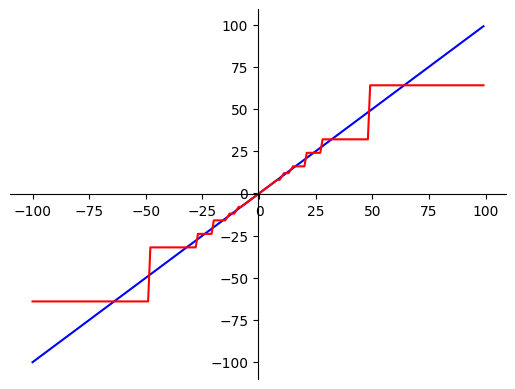

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs_int = [i for i in range(-100, 100)]
ys_int = [i for i in range(-100, 100)]
plt.plot(xs_int, ys_int, 'b')
plt.plot(xs_int, pos8_int_list, 'r')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

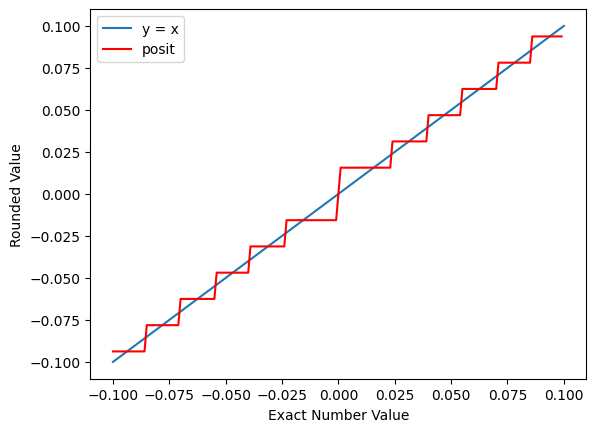

In [ ]:
xs_frac = [i / 10 for i in range(-1, 2)]
ys_frac = [i / 10 for i in range(-1, 2)]
plt.plot(xs_frac, ys_frac, label='y = x')
pos_xs = [i / 1000 for i in range(-100, 100)]
pos_ys = [sp.posit8(i / 1000) for i in range(-100, 100)]
plt.plot(pos_xs, pos_ys, 'r', label='posit')

plt.xlabel("Exact Number Value")
plt.ylabel("Rounded Value")
plt.legend()
plt.show()

In [ ]:
def binary_combinations(n):
    # Loop through all numbers from 0 to 2^n - 1
    bin_list = []
    for i in range(1 << n):
        # Convert the current number to a binary string of length n
        binary_str = format(i, '0' + str(n) + 'b')
        bin_list.append(binary_str)
    return bin_list

print(binary_combinations(2))

['00', '01', '10', '11']


In [ ]:
rng_list = []
for i in range(len(binary_combinations(8))):
  num = binary_combinations(8)[i]
  p8.fromBits(int(num, 2))
  rng_list.append(str(p8))
for i in range(len(rng_list)):
  if rng_list[i] != 'NaR':
    rng_list[i] = float(rng_list[i])

rng_list.remove('NaR')

In [ ]:
rng_list.sort()

Text(0, 0.5, 'Range of Values')

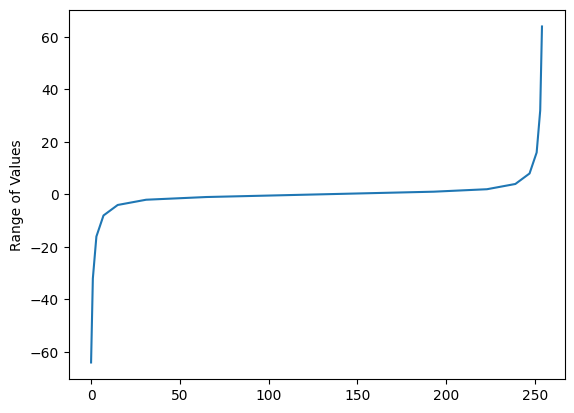

In [ ]:
plt.plot(rng_list)
plt.ylabel('Range of Values')

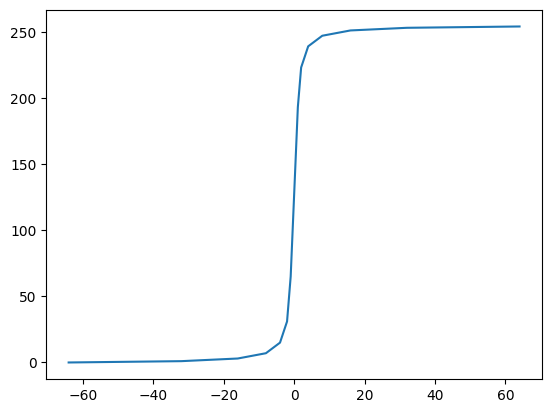

In [ ]:
x = range(255)
plt.plot(rng_list, x)

In [ ]:
print(rng_list[0], rng_list[-1])
print(rng_list[(len(rng_list) // 2) + 1])

-64.0 64.0
0.015625


In [ ]:
rng_list2 = []
for i in range(len(binary_combinations(8))):
  num = binary_combinations(8)[i]
  a = int(num, 2)
  p8.fromBits(a)
  rng_list2.append(str(p8))

for i in range(len(rng_list2)):
  if rng_list2[i] != 'NaR':
    rng_list2[i] = float(rng_list2[i])

rng_list2.remove('NaR')
rng_list2.sort()

In [ ]:
rng_list2 = [i / 64 for i in rng_list2]

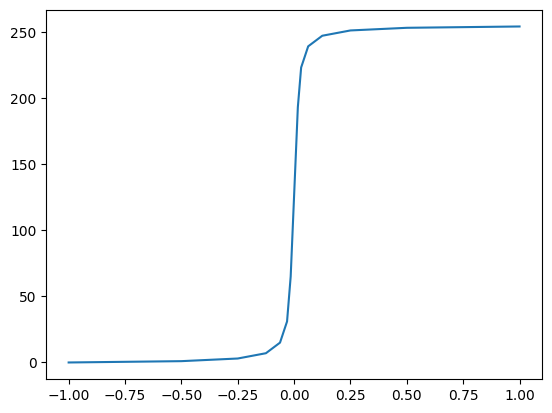

In [ ]:
plt.plot(rng_list2, range(len(rng_list2)))